# Task 4
**Performed by: Kushakov Evgenii, J4132C**

In [2]:
#Import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Exercise 1

Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule data: bioresponse.csv, 

description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 

Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

In [3]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [4]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [5]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    epsilon = 1e-8
    cost = -(1./m) * np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon), axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [6]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost.item()))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [7]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [8]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [9]:
#Read CSV-file
bioresponse_df = pd.read_csv('bioresponse.csv')

display(bioresponse_df.head())

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Set train and test data
bioresponse_data = bioresponse_df.drop('Activity', axis = 1)
bioresponse_target = bioresponse_df['Activity']
X_train, X_test, y_train, y_test = train_test_split(bioresponse_data, bioresponse_target, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
w = np.zeros((X_train.shape[1], 1))
b = 0

n_iter = 1000
learn_rate = 0.01

In [12]:
params_gd, grads_gd, costs_gd = optimize(w, b, X_train.T, y_train.values.reshape(1, -1), n_iter, learn_rate, print_cost=True)

w = params_gd['w']
b = params_gd['b']

predictions = (np.dot(w.T, X_test.T) + b > 0.5).astype(int)

accuracy = np.mean(predictions == y_test.values.reshape(1, -1))
print(f'Accuracy: {(accuracy * 100)}%')

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.471838
Cost after iteration 200: 0.428104
Cost after iteration 300: 0.404304
Cost after iteration 400: 0.388173
Cost after iteration 500: 0.376021
Cost after iteration 600: 0.366282
Cost after iteration 700: 0.358158
Cost after iteration 800: 0.351189
Cost after iteration 900: 0.345086
Accuracy: 75.15991471215352%


# Exercise 2

Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

## Stochastic gradient descent

In [13]:
def stochastic_gradient_descent(w, b, X, Y, n_iter, learn_rate, batch_size=32, print_cost=False):
    costs = []
    m = X.shape[1]

    for i in range(n_iter):
        
        permutation = np.random.permutation(m)
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[:, permutation]

        for j in range(0, m, batch_size):
            
            x_batch = shuffled_X[:, j:j+batch_size]
            y_batch = shuffled_Y[:, j:j+batch_size]
            
            # Cost and gradient calculation 
            grads, cost = propagate(w,b,X,Y)
            
            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]
            
            # update rule
            w = w - learn_rate*dw
            b = b - learn_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost.item()))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [14]:
params_sgd, grads_sgd, costs_sgd = stochastic_gradient_descent(np.zeros((X_train.shape[1], 1)), 0, X_train.T, y_train.values.reshape(1, -1), n_iter, learn_rate, batch_size=32, print_cost=True)

Cost after iteration 0: 0.481011
Cost after iteration 100: 0.232660
Cost after iteration 200: 0.201244
Cost after iteration 300: 0.183386
Cost after iteration 400: 0.171044
Cost after iteration 500: 0.161702
Cost after iteration 600: 0.154240
Cost after iteration 700: 0.148063
Cost after iteration 800: 0.142816
Cost after iteration 900: 0.138272


## Adam optimization

In [15]:
def adam_optimization(w, b, X, Y, n_iter, learn_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, print_cost=False):
    costs = []
    m = X.shape[1]
    j = 1
    v_dw, v_db = 0, 0
    s_dw, s_db = 0, 0

    for i in range(n_iter):
        
        j+=1
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
            
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        v_dw = beta1 * v_dw + (1 - beta1) * dw
        v_db = beta1 * v_db + (1 - beta1) * db

        s_dw = beta2 * s_dw + (1 - beta2) * (dw**2)
        s_db = beta2 * s_db + (1 - beta2) * (db**2)

        v_dw_corrected = v_dw / (1 - beta1**j)
        v_db_corrected = v_db / (1 - beta1**j)

        s_dw_corrected = s_dw / (1 - beta2**j)
        s_db_corrected = s_db / (1 - beta2**j)

        # update rule
        w = w - learn_rate * v_dw_corrected / (np.sqrt(s_dw_corrected) + epsilon)
        b = b - learn_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost.item()))

    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [16]:
params_adam, grads_adam, costs_adam = adam_optimization(np.zeros((X_train.shape[1], 1)), 0, X_train.T, y_train.values.reshape(1, -1), n_iter, learn_rate, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.233874
Cost after iteration 200: 0.188589
Cost after iteration 300: 0.162996
Cost after iteration 400: 0.145538
Cost after iteration 500: 0.132522
Cost after iteration 600: 0.122280
Cost after iteration 700: 0.113907
Cost after iteration 800: 0.106860
Cost after iteration 900: 0.100796


# Exercise 3

For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

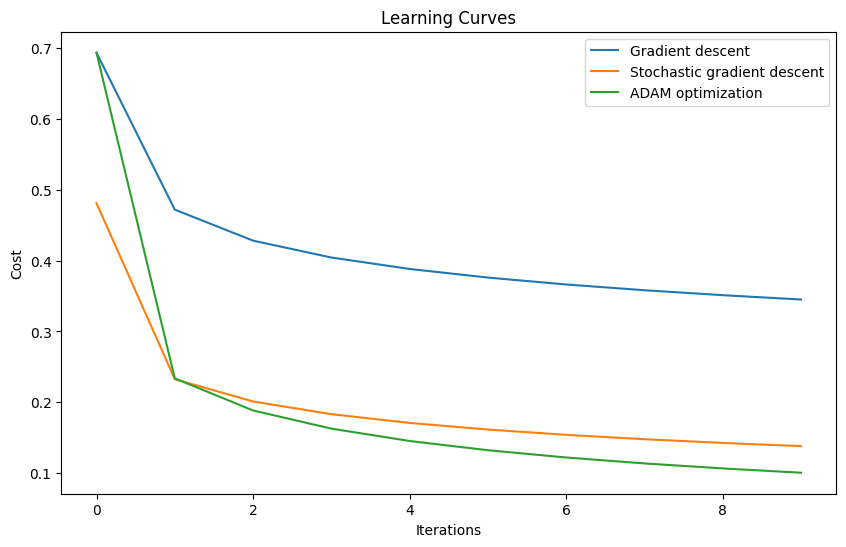

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(costs_gd, label="Gradient descent")
ax.plot(costs_sgd, label="Stochastic gradient descent")
ax.plot(costs_adam, label="ADAM optimization")

ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Learning Curves")
ax.legend()

plt.show()

In [21]:
learn_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

models = {}
costs = {}

for lr in learn_rates:
    
    w = np.zeros((X_train.shape[1], 1))
    b = 0

    params_gd, grads_gd, costs_gd = optimize(w, b, X_train.T, y_train.values.reshape(1, -1), num_iterations = 500, learning_rate = lr)

    models[f'Gradient descent with learning rate {lr}'] = params_gd
    costs[f'Gradient descent with learning rate {lr}'] = costs_gd

    params_sgd, grads_sgd, costs_sgd = stochastic_gradient_descent(w, b, X_train.T, y_train.values.reshape(1, -1), n_iter = 500, learn_rate = lr, batch_size=32)

    models[f'Stochastic gradient descent with learning rate {lr}'] = params_sgd
    costs[f'Stochastic gradient descent with learning rate {lr}'] = costs_sgd

    params_adam, grads_adam, costs_adam = adam_optimization(w, b, X_train.T, y_train.values.reshape(1, -1), n_iter = 500, learn_rate = lr)

    models[f'ADAM optimization with learning rate {lr}'] = params_adam
    costs[f'ADAM optimization with learning rate {lr}'] = costs_adam

    print(f'Learning rate {lr} is ready')

Learning rate 0.1 is ready


C:\Users\user\AppData\Local\Temp\ipykernel_13648\2505253803.py:13: RuntimeWarning: overflow encountered in exp
  s = 1./(1.+np.exp(-z))


Learning rate 0.2 is ready
Learning rate 0.3 is ready
Learning rate 0.4 is ready
Learning rate 0.5 is ready


# Exercise 4

Compare the accuracy of the models fitted with various BP algorithms.

In [22]:
best_model = None
best_accuracy = 0

for model_name, params in models.items():
    
    w = params['w']
    b = params['b']

    predictions = sigmoid(np.dot(w.T, X_test.T) + b)
    predictions = predictions > 0.5

    accuracy = np.mean(predictions == y_test.values.reshape(1, -1))
    print(f"Model: {model_name}, Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"\nBest Model: {best_model}, Accuracy: {best_accuracy}")

Model: Gradient descent with learning rate 0.1, Accuracy: 0.7622601279317697
Model: Stochastic gradient descent with learning rate 0.1, Accuracy: 0.7196162046908315
Model: ADAM optimization with learning rate 0.1, Accuracy: 0.7292110874200426
Model: Gradient descent with learning rate 0.2, Accuracy: 0.755863539445629
Model: Stochastic gradient descent with learning rate 0.2, Accuracy: 0.7174840085287847
Model: ADAM optimization with learning rate 0.2, Accuracy: 0.720682302771855
Model: Gradient descent with learning rate 0.3, Accuracy: 0.7452025586353944
Model: Stochastic gradient descent with learning rate 0.3, Accuracy: 0.7089552238805971
Model: ADAM optimization with learning rate 0.3, Accuracy: 0.7238805970149254
Model: Gradient descent with learning rate 0.4, Accuracy: 0.7420042643923241
Model: Stochastic gradient descent with learning rate 0.4, Accuracy: 0.7046908315565032
Model: ADAM optimization with learning rate 0.4, Accuracy: 0.7174840085287847
Model: Gradient descent with l

C:\Users\user\AppData\Local\Temp\ipykernel_13648\2505253803.py:13: RuntimeWarning: overflow encountered in exp
  s = 1./(1.+np.exp(-z))
